<a href="https://colab.research.google.com/github/vadim13213/neural_networks/blob/main/3cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [1]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [2]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


Нормализация входных данных

In [3]:
from tensorflow import keras

train_X = trainX / 255
test_X = testX / 255

train_Y = keras.utils.to_categorical(trainy, 10) # Перобразование в OneHot Encoding
test_Y = keras.utils.to_categorical(testy, 10) # Перобразование в OneHot Encoding

train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

print(train_X.shape)
print(test_X.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
print(train_Y)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 1.3. Визуализируем часть данных из датасета

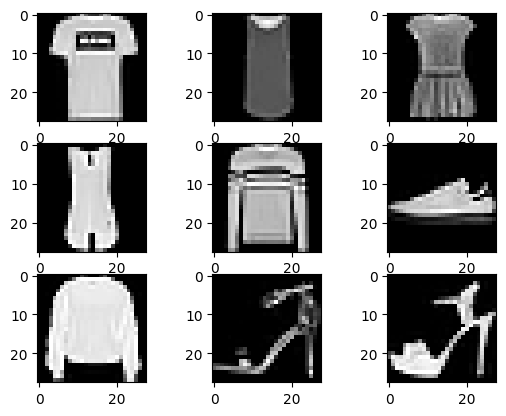

In [5]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [6]:
# Ваш код
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

## 1.5. Обучаем модель

In [7]:
# Ваш код
EPOCH = 3

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


history = model.fit(train_X, train_Y, batch_size=50, epochs=EPOCH, validation_split=0.2)

Epoch 1/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7763 - loss: 0.6146 - val_accuracy: 0.8845 - val_loss: 0.3244
Epoch 2/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8913 - loss: 0.3034 - val_accuracy: 0.9010 - val_loss: 0.2726
Epoch 3/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9097 - loss: 0.2492 - val_accuracy: 0.9042 - val_loss: 0.2588


## 1.6. Анализируем обученную модель. Строим график (графики) обучения

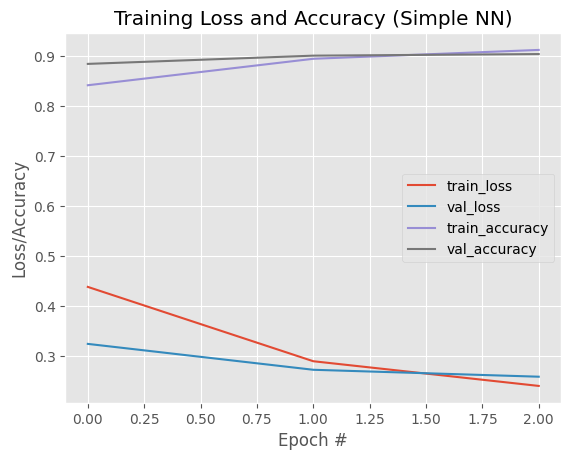

In [8]:
# Ваш код
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [9]:
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model
import pickle

model.save('model_fashion.keras')

labels = LabelBinarizer()
labels.fit_transform(train_Y)

with open('labels_fashion', 'wb') as f:
  f.write(pickle.dumps(labels))

print(labels.classes_)

[0 1 2 3 4 5 6 7 8 9]


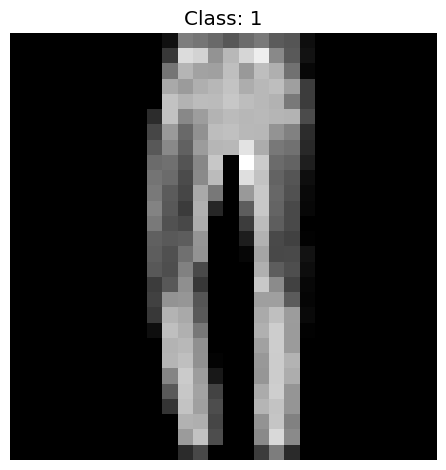

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
Class	Prediction
0	0.00013
1	0.99886
2	0.00001
3	0.00011
4	0.00079
5	0.00000
6	0.00005
7	0.00000
8	0.00006
9	0.00000
Result of prediction: 1



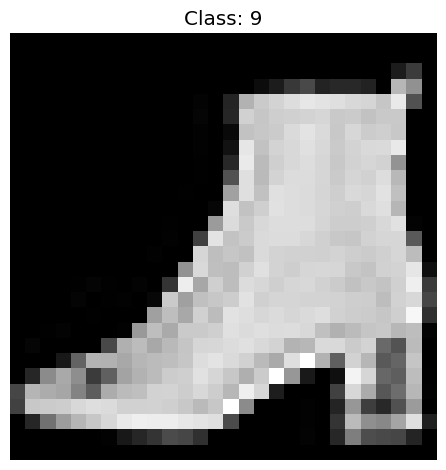

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Class	Prediction
0	0.00000
1	0.00000
2	0.00000
3	0.00000
4	0.00000
5	0.00017
6	0.00000
7	0.00005
8	0.00000
9	0.99977
Result of prediction: 9



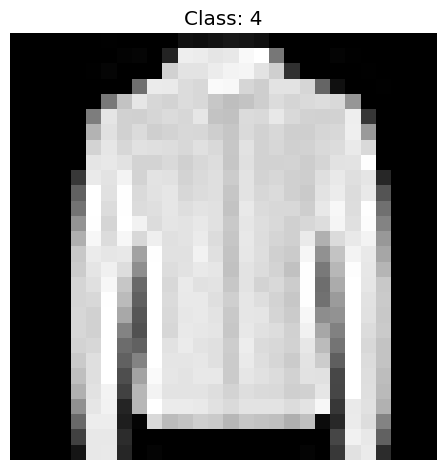

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Class	Prediction
0	0.00011
1	0.00000
2	0.11126
3	0.00000
4	0.86548
5	0.00000
6	0.02315
7	0.00000
8	0.00000
9	0.00000
Result of prediction: 4



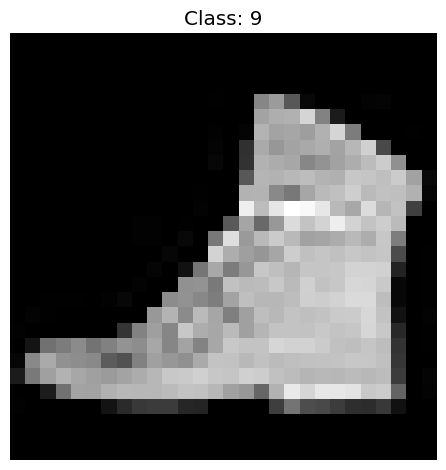

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Class	Prediction
0	0.00000
1	0.00000
2	0.00000
3	0.00000
4	0.00000
5	0.00015
6	0.00000
7	0.06418
8	0.00047
9	0.93519
Result of prediction: 9



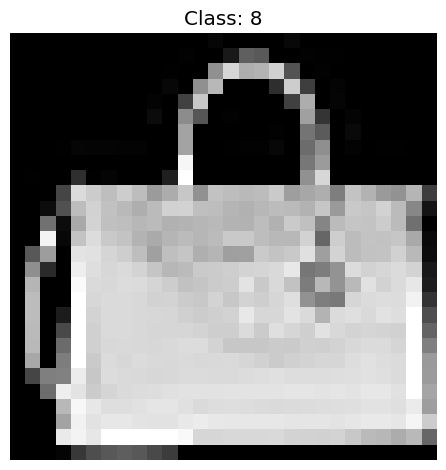

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Class	Prediction
0	0.00000
1	0.00000
2	0.00000
3	0.00000
4	0.00000
5	0.00000
6	0.00000
7	0.00000
8	1.00000
9	0.00000
Result of prediction: 8



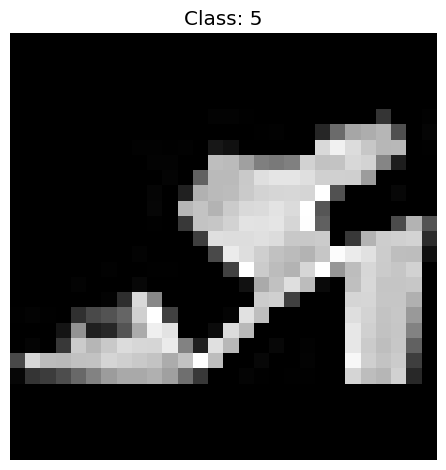

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Class	Prediction
0	0.00000
1	0.00000
2	0.00000
3	0.00000
4	0.00000
5	1.00000
6	0.00000
7	0.00000
8	0.00000
9	0.00000
Result of prediction: 5



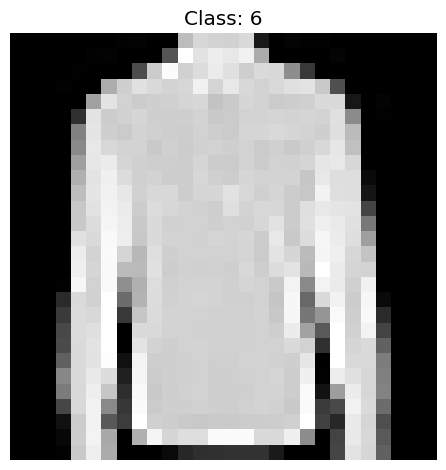

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Class	Prediction
0	0.00010
1	0.00000
2	0.00777
3	0.00000
4	0.05886
5	0.00000
6	0.93327
7	0.00000
8	0.00000
9	0.00000
Result of prediction: 6



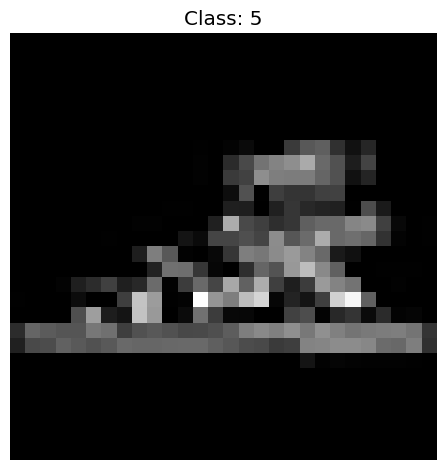

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Class	Prediction
0	0.00139
1	0.00002
2	0.00017
3	0.00053
4	0.00006
5	0.99347
6	0.00099
7	0.00235
8	0.00080
9	0.00023
Result of prediction: 5



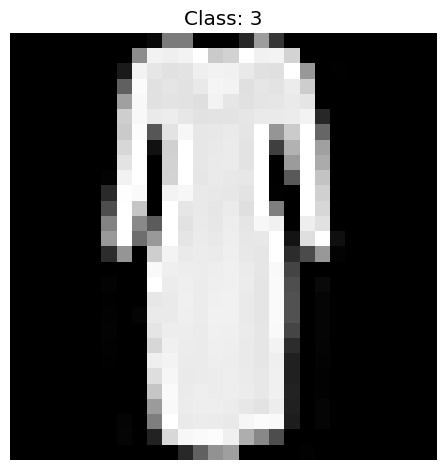

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Class	Prediction
0	0.00098
1	0.00003
2	0.00034
3	0.98498
4	0.00664
5	0.00000
6	0.00700
7	0.00000
8	0.00003
9	0.00000
Result of prediction: 3



In [10]:
def predict_fashion(image, model_path = 'model_fashion.keras', labels_path = 'labels_fashion'):
  model = load_model(model_path)
  lb = pickle.loads(open(labels_path, 'rb').read())

  img = image.reshape(-1, 28, 28, 1)

  preds = model.predict(img)
  preds = preds[0]
  print('Class\tPrediction')
  for i in range(len(preds)):
    print(f'{lb.classes_[i]}\t{preds[i]:.5f}')
  print(f'Result of prediction: {preds.argmax()}\n')

# Ваш код
num = np.random.randint(0, 9999, size=10)

for i in range(1, 10):
    plt.plot()
    plt.title(f'Class: {test_Y[num[i]].argmax()}')
    plt.imshow(testX[num[i]], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    predict_fashion(test_X[num[i]])


# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [11]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!unzip animals.zip -d animals

In [13]:
imagesPath = sorted(list(paths.list_images('/content/drive/MyDrive/Test/training_set')))
random.shuffle(imagesPath)

In [14]:
def load_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size))

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

data, labels = load_images(imagesPath, 64)

In [15]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print(data.shape)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.1)

lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

print(X_train.shape)
print(X_test.shape)

(10745, 64, 64, 3)
(9670, 64, 64, 3)
(1075, 64, 64, 3)


In [16]:
# Ваш код
model_my = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4,  activation='softmax')
])

model_my.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,117,188 (8.08 MB)

 Trainable params: 2,117,188 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
EPOCH = 20

model_my.add(Dense(3, activation='softmax'))  # Выходной слой для 3 классов

model_my.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model_my.fit(X_train, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2)

Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.4241 - loss: 1.0381 - val_accuracy: 0.5145 - val_loss: 0.9235
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5196 - loss: 0.9188 - val_accuracy: 0.5543 - val_loss: 0.8656
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5675 - loss: 0.8597 - val_accuracy: 0.6158 - val_loss: 0.8313
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6261 - loss: 0.8099 - val_accuracy: 0.6577 - val_loss: 0.8009
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6916 - loss: 0.7495 - val_accuracy: 0.6918 - val_loss: 0.7648
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7489 - loss: 0.6758 - val_accuracy: 0.6484 - val_loss: 0.8358
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7800 - loss: 0.6128 - val_accuracy: 0.7042 - val_loss: 0.7051
Epoch 8/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8368 - loss: 0.5132 - val_accuracy:

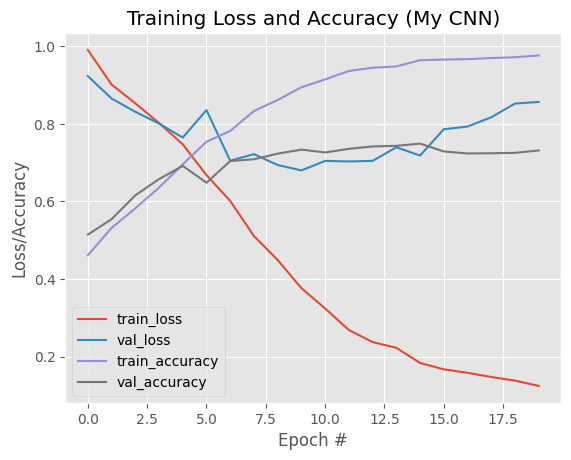

In [19]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [20]:
model_my.save('overfitting_model_my.keras')

Начальные веса, похоже, были очень хорошими и в результате наличия большого количества эпох модель очень сильно переобучилась из-за чего на тренировочной выборке точность достигла порядка 100%, а на валидационной с каждой эпохой падала (и росли потери).

В качестве решения этой проблемы добавлю EarlyStoping, соберу модель и обучу ее заново.

In [22]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint(filepath="best_model_my.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

model_my = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3,  activation='softmax')
])

model_my.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model_my.fit(X_train, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.4378 - loss: 1.0657 - val_accuracy: 0.6396 - val_loss: 0.7818
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6732 - loss: 0.7356 - val_accuracy: 0.6949 - val_loss: 0.7009
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7221 - loss: 0.6466 - val_accuracy: 0.7063 - val_loss: 0.6774
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7661 - loss: 0.5491 - val_accuracy: 0.7146 - val_loss: 0.6601
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7922 - loss: 0.4821 - val_accuracy: 0.7389 - val_loss: 0.6428
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8464 - loss: 0.3802 - val_accuracy: 0.7503 - val_loss: 0.6425
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8803 - loss: 0.2957 - val_accuracy: 0.7001 - val_loss: 0.7660
Epoch 8/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9181 - loss: 0.2250 - val_accuracy: 

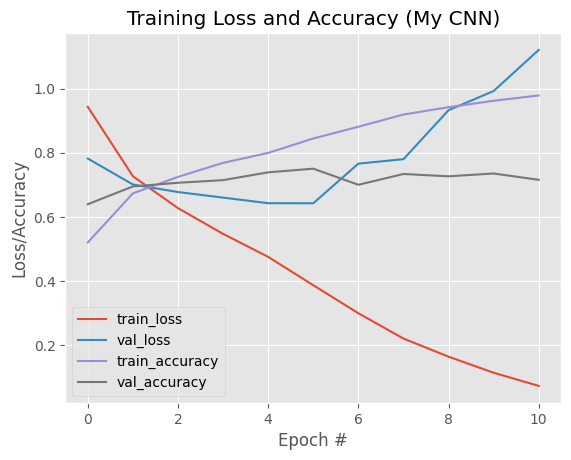

In [24]:
N = np.arange(0,11)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [25]:
# Ваш код

model_resnet_like = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

model_resnet_like.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,336,228 (5.10 MB)

 Trainable params: 1,336,228 (5.10 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
EPOCH = 20
checkpoint = ModelCheckpoint(filepath="best_model_resnet_like.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

model_resnet_like.add(Dense(3, activation='softmax'))  # 3 нейрона для 3 классов

model_resnet_like.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history_resnet_like = model_resnet_like.fit(X_train, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.3756 - loss: 1.0845 - val_accuracy: 0.3806 - val_loss: 1.0141
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4349 - loss: 1.0144 - val_accuracy: 0.4741 - val_loss: 0.9952
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.4789 - loss: 0.9730 - val_accuracy: 0.5460 - val_loss: 0.9392
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5403 - loss: 0.9363 - val_accuracy: 0.5455 - val_loss: 0.9363
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5665 - loss: 0.9127 - val_accuracy: 0.5739 - val_loss: 0.8867
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5991 - loss: 0.8696 - val_accuracy: 0.6241 - val_loss: 0.8438
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6157 - loss: 0.8464 - val_accuracy: 0.6313 - val_loss: 0.8386
Epoch 8/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6443 - loss: 0.8124 - val_acc

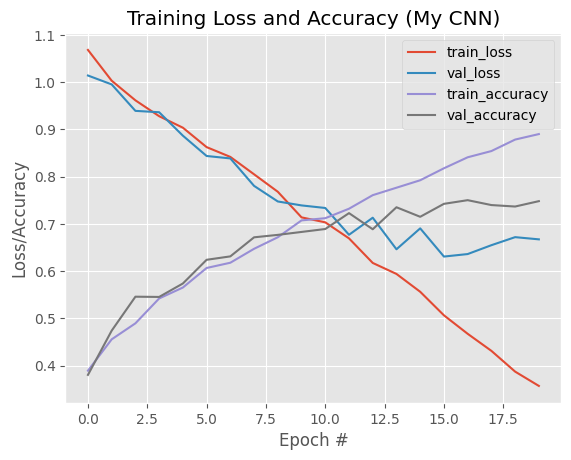

In [29]:
N = np.arange(0, 20)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history_resnet_like.history["loss"], label="train_loss")
plt.plot(N, history_resnet_like.history["val_loss"], label="val_loss")
plt.plot(N, history_resnet_like.history["accuracy"], label="train_accuracy")
plt.plot(N, history_resnet_like.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 2.3. Сохраните полученные модели

In [ ]:
# Ваш код
# сохранены в процессе обучения с помощью чекпоинта

## 2.4. Загрузите обученную модель из прошлой практической работы


In [32]:
# Ваш код
from keras.models import load_model

model_old = load_model('/content/drive/MyDrive/Test/best_model.h5')


## 2.5. Сравните между собой точность всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

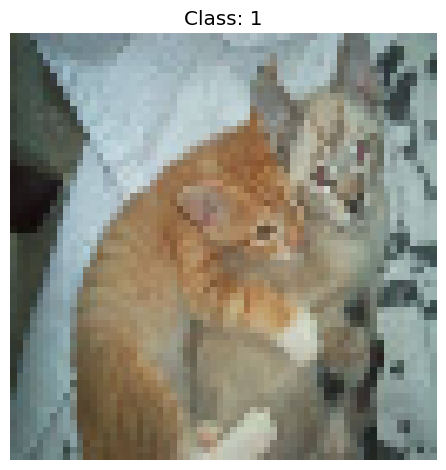

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.42437		0.02175		0.06356
cats	0.20686		0.74052		0.75082
dogs	0.36877		0.23773		0.18562
Result:	0		1		1



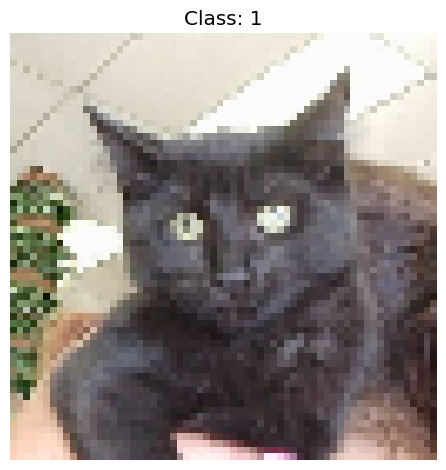

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.19612		0.01666		0.41614
cats	0.47273		0.85907		0.21601
dogs	0.33116		0.12428		0.36786
Result:	1		1		1



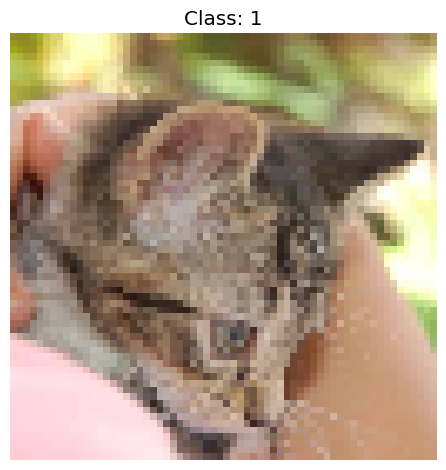

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.24014		0.03613		0.14598
cats	0.29811		0.21170		0.20222
dogs	0.46175		0.75217		0.65180
Result:	2		2		2



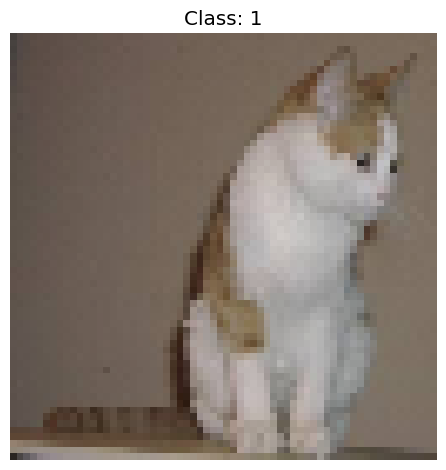

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.03945		0.62105		0.90259
cats	0.57450		0.23957		0.05097
dogs	0.38605		0.13938		0.04644
Result:	1		0		0



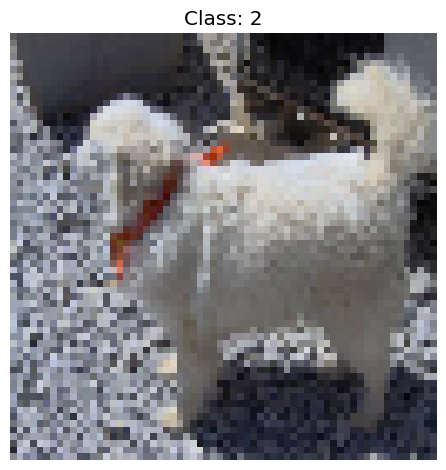

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.05114		0.00488		0.04929
cats	0.51727		0.59016		0.08447
dogs	0.43158		0.40496		0.86623
Result:	1		1		1



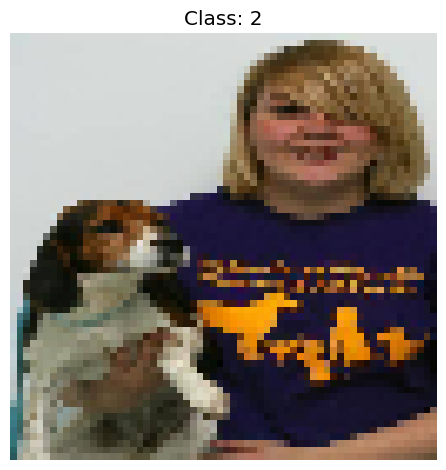

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.30334		0.00052		0.02873
cats	0.41942		0.67508		0.81117
dogs	0.27724		0.32440		0.16010
Result:	1		1		1



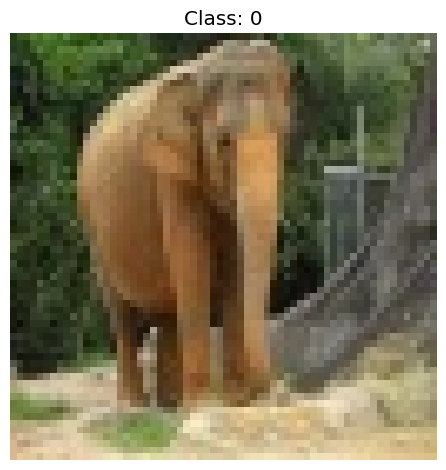

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.55444		0.99804		0.90290
cats	0.17878		0.00005		0.05079
dogs	0.26678		0.00192		0.04631
Result:	0		0		0



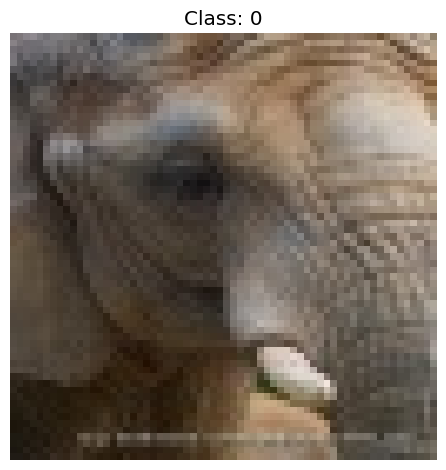

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.33901		0.60170		0.90080
cats	0.26299		0.26918		0.05163
dogs	0.39800		0.12912		0.04757
Result:	2		0		0



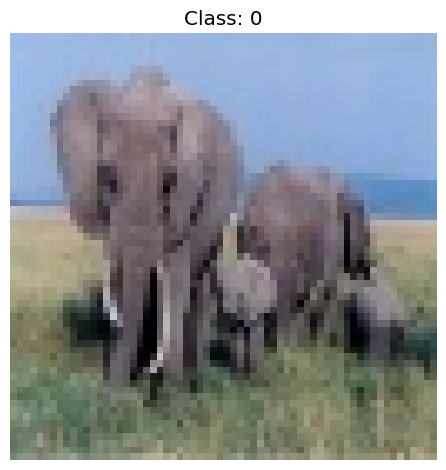

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.67939		0.99990		0.90292
cats	0.12640		0.00001		0.05078
dogs	0.19421		0.00009		0.04630
Result:	0		0		0



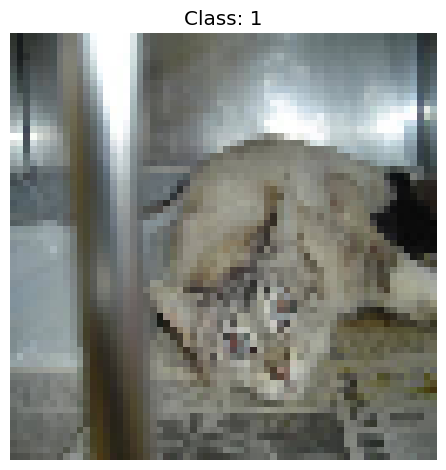

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.36034		0.03608		0.03155
cats	0.24394		0.84106		0.78477
dogs	0.39572		0.12287		0.18368
Result:	2		1		1



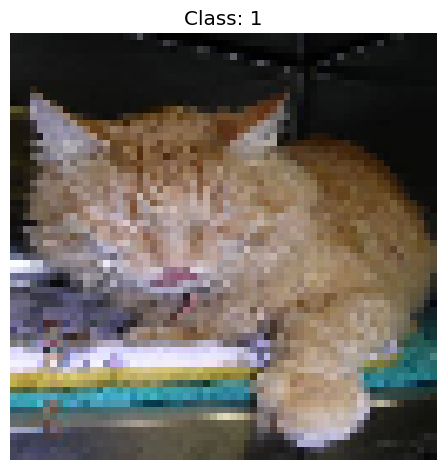

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.00695		0.00016		0.02870
cats	0.72666		0.93742		0.81140
dogs	0.26639		0.06242		0.15989
Result:	1		1		1



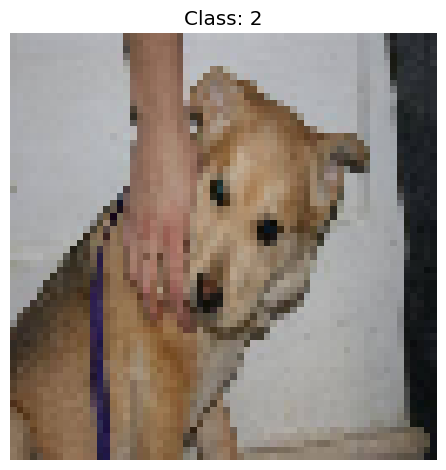

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.13401		0.00851		0.05683
cats	0.40044		0.71290		0.37680
dogs	0.46555		0.27858		0.56637
Result:	2		1		1



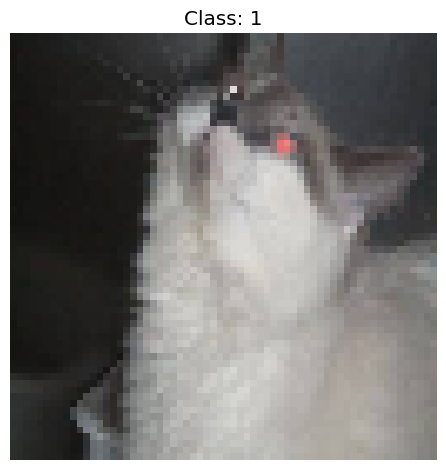

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.00422		0.01984		0.02890
cats	0.76073		0.88228		0.81043
dogs	0.23505		0.09788		0.16067
Result:	1		1		1



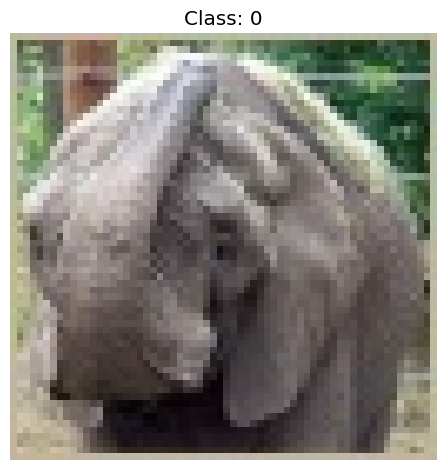

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.27148		0.74757		0.90245
cats	0.40146		0.06620		0.05098
dogs	0.32706		0.18624		0.04656
Result:	1		0		0



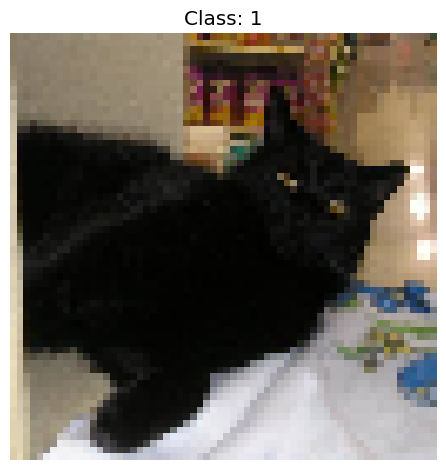

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.02310		0.00012		0.02867
cats	0.71147		0.99660		0.81165
dogs	0.26543		0.00327		0.15968
Result:	1		1		1



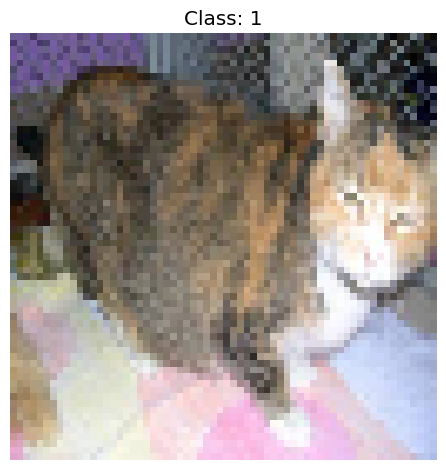

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.06181		0.01086		0.03217
cats	0.49062		0.35182		0.78609
dogs	0.44758		0.63732		0.18174
Result:	1		2		2



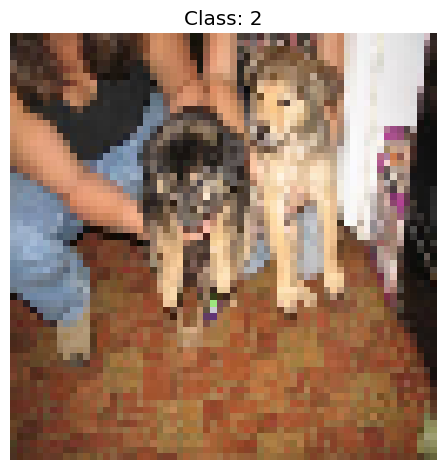

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.08948		0.00070		0.05951
cats	0.45109		0.98298		0.35919
dogs	0.45943		0.01632		0.58130
Result:	2		1		1



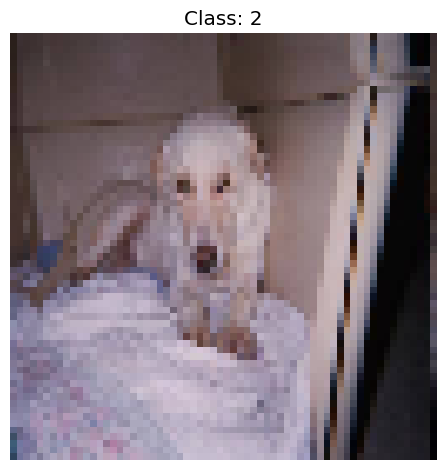

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.00432		0.15601		0.03504
cats	0.76472		0.70685		0.74863
dogs	0.23096		0.13714		0.21633
Result:	1		1		1



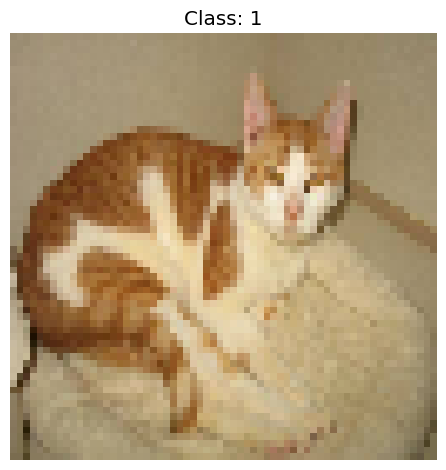

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.03285		0.00460		0.03225
cats	0.56740		0.52973		0.78276
dogs	0.39975		0.46567		0.18499
Result:	1		1		1



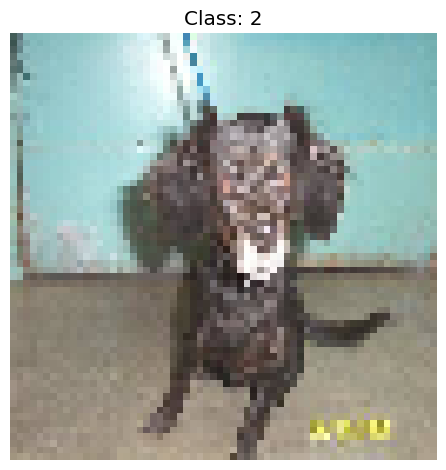

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
Class	Old_model	My_model	ResNet_like
ELEPHANT	0.59741		0.21587		0.43109
cats	0.18138		0.01993		0.13863
dogs	0.22121		0.76420		0.43028
Result:	0		2		2



In [33]:
# Ваш код
def predict_class(image, labels):
  model_1 = load_model('/content/drive/MyDrive/Test/best_model.h5')
  model_2 = load_model('/content/best_model_my.keras')
  model_3 = load_model('/content/best_model_resnet_like.keras')

  img_flat = image.flatten()
  img_flat = img_flat.reshape((1, img_flat.shape[0]))
  img = image.reshape(-1, 64, 64, 3)

  preds_1 = model_1.predict(img_flat)
  preds_1 = preds_1[0]
  preds_2 = model_2.predict(img)
  preds_2 = preds_2[0]
  preds_3 = model_3.predict(img)
  preds_3 = preds_3[0]
  print('Class\tOld_model\tMy_model\tResNet_like')
  for i in range(len(preds_1)):
    print(f'{labels.classes_[i]}\t{preds_1[i]:.5f}\t\t{preds_2[i]:.5f}\t\t{preds_3[i]:.5f}')
  print(f'Result:\t{preds_1.argmax()}\t\t{preds_2.argmax()}\t\t{preds_2.argmax()}\n')

num = np.random.randint(0, 719, size=20)

for i in range(0, 20):
    image_show = X_test[num[i]]
    plt.plot()
    plt.title(f'Class: {Y_test[num[i]].argmax()}')
    plt.imshow(image_show[:, :, ::-1])
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    predict_class(X_test[num[i]], lb)


# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [34]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [35]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [36]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

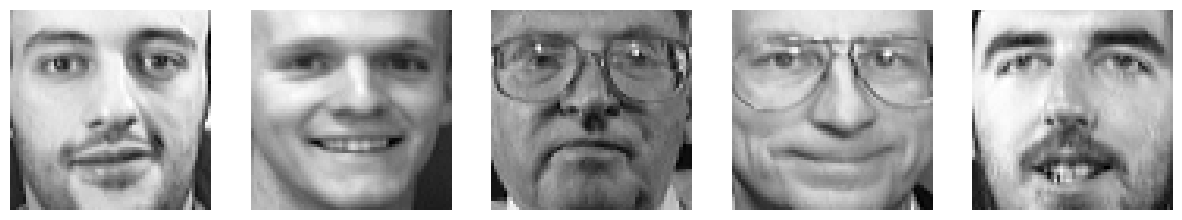

In [37]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [38]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [39]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

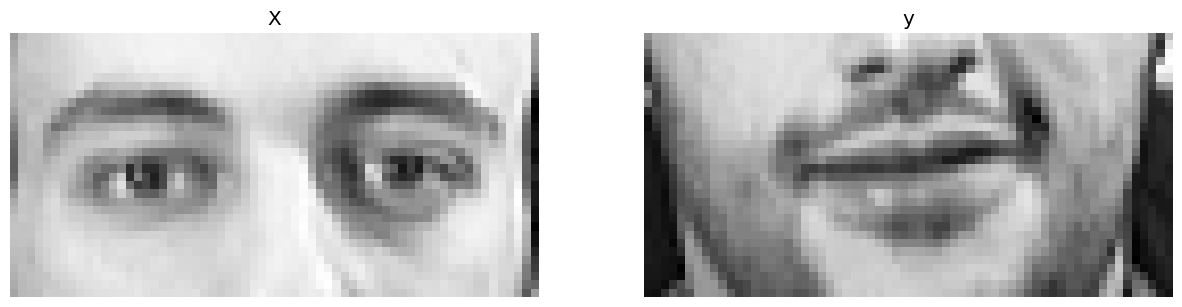

In [40]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [41]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [42]:
# Ваш код здесь
model_rec = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 64, 1)),
    MaxPooling2D((2,2), strides=2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),

    Dense(2048, activation='sigmoid'),
])

model_rec.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 32, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 16, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 8, 16, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 16, 256)          │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 4, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2048)                │       2,099,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,188,992 (27.42 MB)

 Trainable params: 7,188,992 (27.42 MB)

 Non-trainable params: 0 (0.00 B)

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [43]:
# Ваш код здесь
model_rec.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [44]:
# Ваш код здесь
EPOCH = 100

checkpoint = ModelCheckpoint(filepath="best_model_rec.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

history_rec = model_rec.fit(X_train, y_train_n, batch_size=32, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 471ms/step - accuracy: 0.0000e+00 - loss: 0.0254 - val_accuracy: 0.0000e+00 - val_loss: 0.0219
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.0000e+00 - loss: 0.0211 - val_accuracy: 0.0156 - val_loss: 0.0220
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0116 - loss: 0.0208 - val_accuracy: 0.0156 - val_loss: 0.0217
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0244 - loss: 0.0205 - val_accuracy: 0.0000e+00 - val_loss: 0.0214
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0066 - loss: 0.0203 - val_accuracy: 0.0000e+00 - val_loss: 0.0216
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0209 - val_accuracy: 0.0000e+00 - val_loss: 0.0215
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0035 - loss: 0.0200 - val_accuracy: 0.0000e+00 - val_loss: 0.0212
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0093 - loss: 0.0195 

## 3.5. Сделайте предсказания на тестовых данных

In [45]:
# Ваш код здесь
preds = model_rec.predict(X_test, batch_size=10)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


## 3.6. Посчитайте метрику качества на тестовых данных

In [46]:
# Ваш код здесь

from sklearn.metrics import mean_squared_error

mean_squared_error(preds, y_test_n)

0.009345561265945435

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [47]:
preds.shape

(80, 2048)

In [48]:
# Ваш код здесь
pred_test = preds.reshape(preds.shape[0], 32, 64)

Отрисуйте все предсказания.

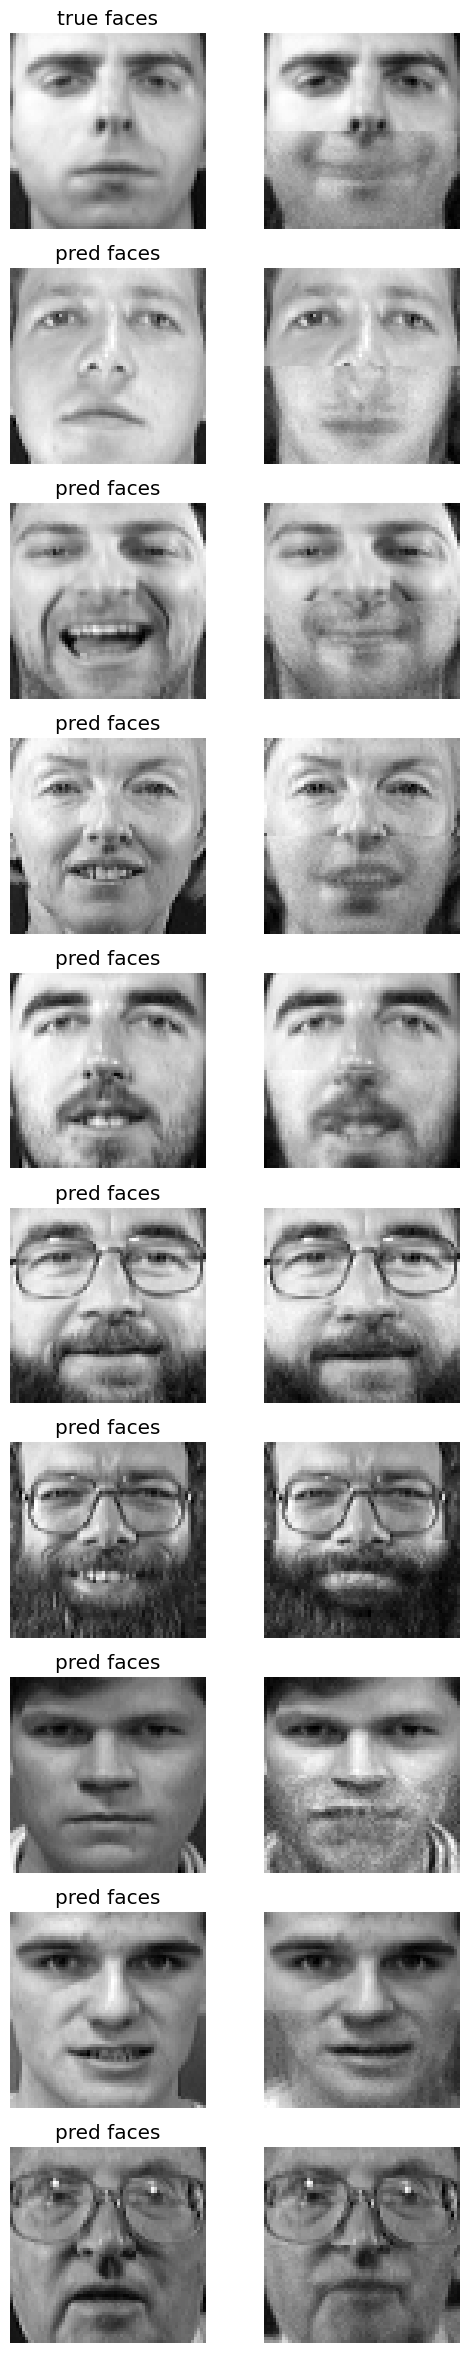

In [50]:
# Пример кода:

n_faces = 10
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(10):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title='pred faces')
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )